In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/datosProyect")
!ls

Mounted at /content/drive
eeg-eye-state.csv


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/datosProyect/eeg-eye-state.csv",header=None)
values = data.values
print(values)


[['V1' 'V2' 'V3' ... 'V13' 'V14' 'Class']
 ['4329.23' '4009.23' '4289.23' ... '4635.9' '4393.85' '1']
 ['4324.62' '4004.62' '4293.85' ... '4632.82' '4384.1' '1']
 ...
 ['4277.44' '3990.77' '4246.67' ... '4591.79' '4339.49' '2']
 ['4284.62' '3991.79' '4251.28' ... '4596.41' '4350.77' '2']
 ['4287.69' '3997.44' '4260' ... '4597.95' '4350.77' '2']]


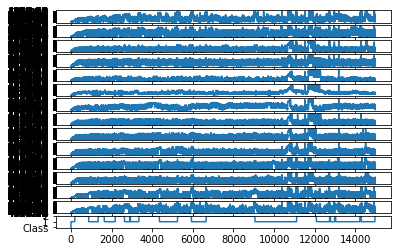

In [ ]:
from matplotlib import pyplot
pyplot.figure()
for i in range(values.shape[1]):
  pyplot.subplot(values.shape[1], 1, i+1)
  pyplot.plot(values[:,i])
pyplot.show()

In [ ]:
#preprocesamiento de los datos 
#aplicando limpieza de datos por el ruido que existe
#print(values)
a = values[1:,:]
b = values[0,:]
#print(a)
#print(b)
for i in range(a.shape[1]-1):
  #calculamos la media y desviacion estandar
  a= np.array(a,dtype=np.float64)  
  d_mean = np.mean(np.array(a[:,i], dtype=np.float64))
  d_std = np.std(np.array(a[:,i], dtype=np.float64))
  #limite de valor atipico
  cut_off= d_std*4
  lower, upper = d_mean - cut_off , d_mean + cut_off
  #eliminando pequenios
  too_small = [j for j in range(a.shape[0]) if a[j,i] < lower]
  a = np.delete(a, too_small, 0)
  #eliminando grandes
  too_large = [j for j in range(a.shape[0]) if a[j,i] > upper]
  a = np.delete(a, too_large, 0)

np.savetxt('/content/drive/MyDrive/datosProyect/EEG_Eye_State_sin_valAt.csv', a, delimiter=',')






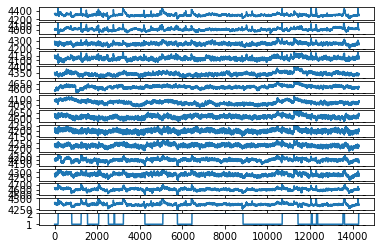

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/datosProyect/EEG_Eye_State_sin_valAt.csv",header=None)
values2= data2.values
pyplot.figure()
for i in range(values2.shape[1]):
  pyplot.subplot(values2.shape[1], 1, i+1)
  pyplot.plot(values2[:,i])
pyplot.show()